## Importing Panda

In [1]:
import pandas as pd

### Importing CSVs

In [4]:
df = pd.read_csv('Drone_RCS_Measurement_Dataset/F450_HH.csv')
df1 = pd.read_csv('Drone_RCS_Measurement_Dataset/Heli_HH.csv')

### Adding name column

In [5]:
df['Type'] = 0
df1['Type'] = 1
df.head()

,f[GHz],theta[deg],phi[deg],RCS[dB],Type
0,26,-90,0,-36.674,0
1,26,-89,0,-32.870,0
2,26,-88,0,-27.646,0
3,26,-87,0,-21.883,0
4,26,-86,0,-18.182,0


In [6]:
# df.head()

In [7]:
# df1.head()

### Removing theta and phi columns from the dataset

###### 2 columns are useless: theta[deg], phi[deg]

In [8]:
df_reduced = df.drop(columns=['theta[deg]', 'phi[deg]'])
df1_reduced = df1.drop(columns=['theta[deg]', 'phi[deg]'])

### Merging df_reduced and df1_reduced

In [9]:
frames = [df_reduced, df1_reduced]
result = pd.concat(frames)
print(result)

        f[GHz]   RCS[dB]  Type
0           26 -36.67400     0
1           26 -32.87000     0
2           26 -27.64600     0
3           26 -21.88300     0
4           26 -18.18200     0
...        ...       ...   ...
491410      40  -0.85614     1
491411      40  -2.61810     1
491412      40   0.30486     1
491413      40  -0.41914     1
491414      40  -1.99710     1

[982830 rows x 3 columns]


### Saving result as csv

In [10]:
result.to_csv('merged_df.csv')

# ML Test

1.1.1. Ordinary Least Squares

Coefficients: 
 [-3.37020516e-05 -6.75682008e-05]
Mean squared error: 0.25
Coefficient of determination: -0.00


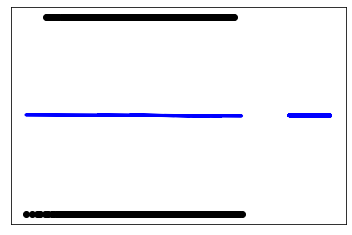

In [95]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# Split data into data/target
X = result.drop(columns=['Type'])
Y = result['Type']

# Split data/targer into training/testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, Y_train)

# Make predictions using the testing set
Y_pred = regr.predict(X_test)

# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(Y_test, Y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(Y_test, Y_pred))


# Plot outputs
plt.scatter(X_test.iloc[0:, 1], Y_test, color="black")
plt.plot(X_test, Y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()
